# Logistic Regression from Scratch in TensorFlow

This notebook implements a simple binary logistic regression model from scratch using TensorFlow.

## 1. Import Libraries

In [1]:
from cProfile import label

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.bipartite.basic import color

## 2. Generate Toy Data

In [2]:
num_samples = 100
X = np.random.randn(num_samples, 2).astype(np.float32)
y = (X[:, 0] + X[:, 1] > 0).astype(np.int32)
X

array([[-1.1461676 ,  0.36804563],
       [ 0.1606709 , -2.9343464 ],
       [-1.3955505 , -0.9189772 ],
       [-0.13803189,  1.8053937 ],
       [ 0.8536804 ,  1.6780533 ],
       [ 1.6818396 , -0.2534008 ],
       [-0.4803063 , -0.73927116],
       [-1.6550145 ,  0.66008365],
       [-0.8037594 , -0.5779367 ],
       [-0.75821525,  0.42747533],
       [ 0.45956066, -1.2050855 ],
       [ 0.11938658, -0.60814524],
       [-1.3911593 , -0.5080915 ],
       [-0.335685  , -0.20217994],
       [-0.23732013, -2.1176755 ],
       [ 0.28725958, -0.46009713],
       [-1.9729335 ,  0.06085037],
       [ 0.43932176, -2.017982  ],
       [-0.1237324 ,  1.2411599 ],
       [-1.7926532 , -0.6317467 ],
       [-0.80360115, -1.2302057 ],
       [ 0.2995123 ,  0.23984835],
       [-0.48234916,  0.16611657],
       [ 0.8846531 ,  0.108155  ],
       [ 0.11633525, -0.9953728 ],
       [-0.32383847, -0.3037088 ],
       [ 1.0710747 , -0.26547414],
       [-0.13097185,  1.695925  ],
       [-0.5330958 ,

## 3. Define Model Parameters

In [3]:
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.zeros([1]))

## 4. Define the Model

In [4]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


def logistic_regression(x):
    return sigmoid(tf.matmul(x, W) + b)

## 5. Define the Loss Function

In [5]:
def loss_fn(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

## 6. Define the Optimizer

In [6]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

## 7. Training Loop

In [7]:
epochs = 1000
losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(X)
        loss = loss_fn(y.reshape(-1, 1), y_pred)

    losses.append(loss.numpy())

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy():.4f}')

Epoch 100/1000, Loss: 0.9509
Epoch 200/1000, Loss: 0.7209
Epoch 300/1000, Loss: 0.5734
Epoch 400/1000, Loss: 0.4800
Epoch 500/1000, Loss: 0.4181
Epoch 600/1000, Loss: 0.3746
Epoch 700/1000, Loss: 0.3424
Epoch 800/1000, Loss: 0.3173
Epoch 900/1000, Loss: 0.2972
Epoch 1000/1000, Loss: 0.2807


## 8. Visualize the Results

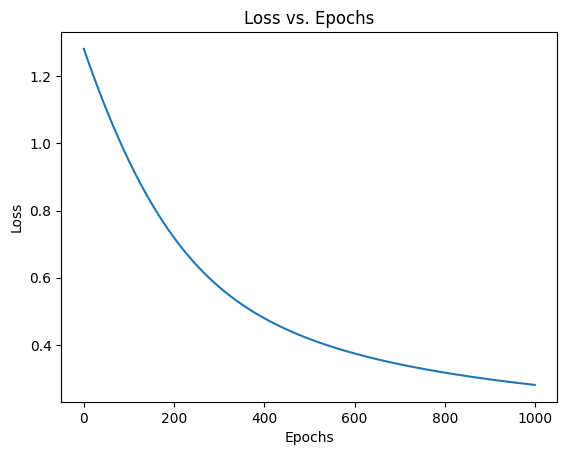

In [8]:
plt.plot(losses)
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

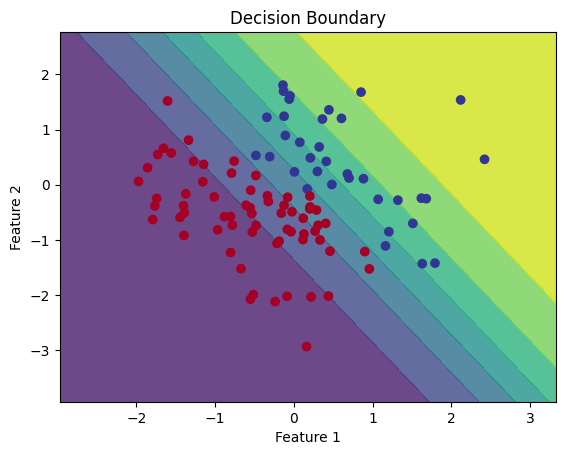

In [9]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
grid = np.c_[xx1.ravel(), xx2.ravel()].astype(np.float32)
probs = logistic_regression(grid).numpy().reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [59]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32)
y_test = tf.constant(y_test.reshape(-1, 1), dtype=tf.float32)

W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))


def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


learning_rate = 0.1
epochs = 300
losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = sigmoid(tf.matmul(X_train, W) + b)
        loss = tf.reduce_mean(-(y_train * tf.math.log(y_pred + 1e-9) +
                        (1 - y_train) * tf.math.log(1 - y_pred + 1e-9)))

    grad = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * grad[0])
    b.assign_sub(learning_rate * grad[1])
    losses.append(loss.numpy())
print("Final Loss:", losses[-1])

Final Loss: 0.3647582


Text(0, 0.5, 'Feature 2')

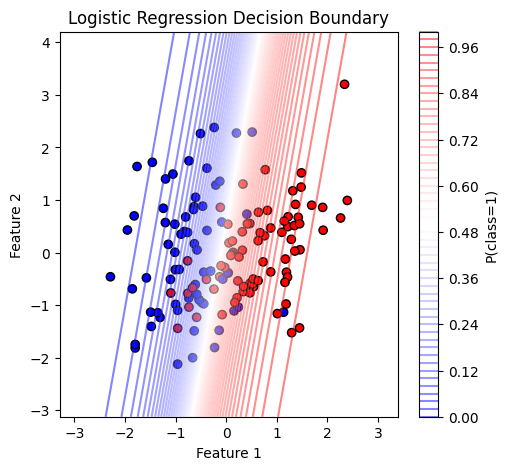

In [51]:
## mesh grid

x_min, x_max = X_train[:, 0].numpy().min() - 1, X_train[:, 0].numpy().max() + 1
y_min, y_max = X_train[:, 1].numpy().min() - 1, X_train[:, 1].numpy().max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = tf.constant(grid, dtype=tf.float32)

probs = tf.sigmoid(tf.matmul(grid_tensor, W) + b).numpy().reshape(xx.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contour(xx, yy, probs, levels=50, cmap='bwr', alpha=0.5)
plt.colorbar(label="P(class=1)")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], cmap="bwr", edgecolors="k")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

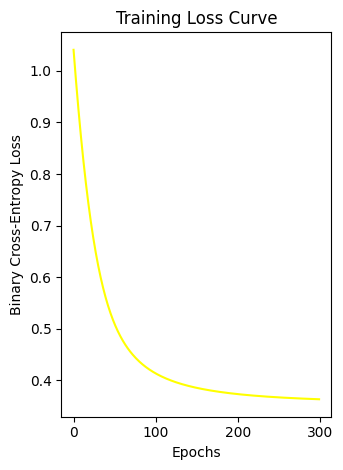

In [52]:
plt.subplot(1, 2, 2)
plt.plot(losses, color='yellow')
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.tight_layout()
plt.show()